In [511]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import re
import plotly.express as px
import nltk as nlp
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict as cvp

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score, mean_squared_log_error

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from collections import Counter
import joblib
import ydata_profiling as pp


from yellowbrick.regressor import AlphaSelection

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR


import xgboost as xgb
import lightgbm as lgb
import warnings

warnings.filterwarnings('ignore')


from sklearn.svm import SVR, LinearSVR

from sklearn.neural_network import MLPRegressor

import sklearn.model_selection


import xgboost as xgb
import lightgbm as lgb

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import os
for dirname, _, filenames in os.walk('../dataframe/cars.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/odatasets/olx_pe_sample.csv
/kaggle/input/odatasetsas/olx_pe_sample (2).csv
/kaggle/input/carrosomente/carro_2.csv
/kaggle/input/carrosestados/df_olx_pb.csv
/kaggle/input/carrosestados/df_olx_rn.csv
/kaggle/input/carrosestados/df_olx_es.csv
/kaggle/input/carrosestados/df_olx_al.csv
/kaggle/input/carrosestados/df_olx_pi.csv


In [512]:
dfPE = pd.read_csv('/kaggle/input/carrosomente/carro_2.csv',sep=',', lineterminator='\r')
dfAL = pd.read_csv('/kaggle/input/carrosestados/df_olx_al.csv',sep=',', lineterminator='\r')
dfES = pd.read_csv('/kaggle/input/carrosestados/df_olx_es.csv',sep=',', lineterminator='\r')
dfPB = pd.read_csv('/kaggle/input/carrosestados/df_olx_pb.csv',sep=',', lineterminator='\r')
dfPI = pd.read_csv('/kaggle/input/carrosestados/df_olx_pi.csv',sep=',', lineterminator='\r')
dfRN = pd.read_csv('/kaggle/input/carrosestados/df_olx_rn.csv',sep=',', lineterminator='\r')

In [513]:
df = pd.concat([dfPE, dfAL,dfES,dfPB,dfPI,dfRN], ignore_index=True, sort=False)

In [514]:
df.shape

(103009, 30)

In [515]:
df.columns

Index(['link', 'nome_anuncio', 'desc', 'orig_preco', 'preco', 'categoria',
       'modelo', 'marca', 'tipo_carro', 'ano', 'quilometragem', 'cilindrada',
       'combustivel', 'gnv', 'cambio', 'cor', 'portas', 'fim_placa', 'direcao',
       'airbag', 'alarme', 'ar_condicionado', 'trava_eletrica',
       'vidro_eletrico', 'som', 'sensor_re', 'camera_re', 'blindado', 'estado',
       'municipio'],
      dtype='object')

In [516]:
df.drop(['url', 'title', 'desc', 'orig_price', 'categoria','fim_placa','municipio'], axis=1, inplace=True)

In [517]:
df.isna().sum()/df.shape[0]*100

preco              18.370239
modelo             18.370239
marca              18.373152
tipo_carro         24.044501
ano                18.373152
quilometragem      18.383831
cilindrada         22.736848
combustivel        20.872933
gnv                18.373152
cambio             20.484618
cor                21.033114
portas             22.601909
direcao            23.826073
airbag              0.005825
alarme              0.005825
ar_condicionado     0.005825
trava_eletrica      0.005825
vidro_eletrico      0.005825
som                 0.005825
sensor_re           0.005825
camera_re           0.005825
blindado            0.005825
estado             18.373152
dtype: float64

In [518]:
df = df.dropna(how='any',axis=0) 

In [519]:
df.shape

(68759, 23)

In [520]:
df['price'].replace('', np.nan, inplace=True)

In [521]:
df.shape

(68759, 23)

In [522]:
df = df.dropna(subset=['regdate', 'mileage', 'brand', 'model','price'])

In [523]:
df.shape

(68759, 23)

In [524]:
df.duplicated().sum()

7311

In [525]:
df = df.drop_duplicates()

In [526]:
df.shape

(61448, 23)

In [527]:
df = df[df["cartype"].notnull()]

In [528]:
df.shape

(61448, 23)

In [529]:
#changing from states to regions
df=df.replace(to_replace=['PR', 'RS', 'SC'], value='Sul')
df=df.replace(to_replace=['ES', 'MG', 'RJ', 'SP'], value='Sudeste')
df=df.replace(to_replace=['DF', 'GO', 'MT', 'MS'], value='Centro-Oeste')
df=df.replace(to_replace=['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'], value='Nordeste')
df=df.replace(to_replace=['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'], value='Norte')

In [530]:
df.shape

(61448, 23)

In [531]:
manufacturer_values = df['brand'].value_counts()

In [532]:
df.shape

(61448, 23)

In [533]:
print(manufacturer_values)

marca
CHEVROLET     10230
VOLKSWAGEN     9817
FIAT           9517
FORD           5300
RENAULT        4384
              ...  
DKW VEMAG         1
DACON             1
MATRA             1
FYBER             1
ACURA             1
Name: count, Length: 77, dtype: int64


In [534]:
df['brand'] = df['brand'].apply(lambda x: x if str(x) in manufacturer_values[:20] else 'outros')

In [535]:
model_values = df['model'].value_counts()
df['model'] = df['model'].apply(lambda x: x if str(x) in model_values[:50] else 'outros')

In [536]:
manufacturer_values = df['brand'].value_counts()

In [537]:
print(manufacturer_values)

marca
CHEVROLET        10230
VOLKSWAGEN        9817
FIAT              9517
FORD              5300
RENAULT           4384
TOYOTA            4135
HYUNDAI           4071
JEEP              2599
HONDA             2312
NISSAN            1896
CITROEN           1223
PEUGEOT           1218
MITSUBISHI        1170
outros             813
KIA MOTORS         604
MERCEDES-BENZ      448
BMW                422
AUDI               417
LAND ROVER         322
CHERY              288
SUZUKI             262
Name: count, dtype: int64


In [538]:
df = df[~df.brand.str.contains("outros", na=False)]

In [539]:
df = df[~df.model.str.contains("outros", na=False)]

In [540]:
df.shape

(13081, 23)

In [541]:
for i in df.columns:
  print(i, len(df[i].value_counts().index))

preco 1561
modelo 50
marca 10
tipo_carro 9
ano 94
quilometragem 3621
cilindrada 12
combustivel 7
gnv 2
cambio 3
cor 10
portas 2
direcao 4
airbag 2
alarme 2
ar_condicionado 2
trava_eletrica 2
vidro_eletrico 2
som 2
sensor_re 2
camera_re 2
blindado 2
estado 6


In [542]:
df.describe()

,tipo_carro,quilometragem,combustivel,gnv,cambio,cor,portas,direcao,airbag,alarme,ar_condicionado,trava_eletrica,vidro_eletrico,som,sensor_re,camera_re
count,13081.000000,1.308100e+04,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000,13081.00000,13081.000000,13081.000000,13081.000000,13081.000000,13081.000000
mean,5.382310,9.260577e+11,1.989603,0.041511,0.322835,1.906353,0.955508,0.938002,0.431695,0.411895,0.49377,0.480621,0.479550,0.450118,0.253115,0.176439
std,1.655061,9.754070e+13,0.481031,0.199476,0.469373,1.791551,0.206193,0.977293,0.495331,0.492195,0.49998,0.499643,0.499601,0.497525,0.434813,0.381208
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.100000e+04,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,6.600000e+04,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,9.900000e+04,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
max,9.000000,1.111111e+16,6.000000,1.000000,2.000000,9.000000,1.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [543]:
df

,preco,modelo,marca,tipo_carro,ano,quilometragem,cilindrada,combustivel,gnv,cambio,...,airbag,alarme,ar_condicionado,trava_eletrica,vidro_eletrico,som,sensor_re,camera_re,blindado,estado
4,R$ 6.300,TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.,TOYOTA,7.0,2013,90000.0,2.0 - 2.9,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,Nordeste
25,R$ 0,VOLKSWAGEN GOL (NOVO) 1.0 MI TOTAL FLEX 8V 4P,VOLKSWAGEN,4.0,2022,5000.0,1.0,2.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,Nordeste
35,R$ 36,VOLKSWAGEN VOYAGE 1.6 MSI FLEX 8V 4P,VOLKSWAGEN,7.0,2015,90000.0,1.6,2.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,Nordeste
43,R$ 259,TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.,TOYOTA,7.0,2022,0.0,2.0 - 2.9,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,Nordeste
45,R$ 0,CHEVROLET CLASSIC LIFE/LS 1.0 VHC FLEXP. 4P,CHEVROLET,7.0,2012,119800.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102861,R$ 150.000,TOYOTA HILUX CD SRV D4-D 4X4 3.0 TDI DIESEL AUT,TOYOTA,6.0,2015.0,244767.0,3.0 - 3.9,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,rn
102901,R$ 230.000,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,JEEP,8.0,2023.0,12.0,2.0 - 2.9,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,rn
102911,R$ 156.900,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,JEEP,8.0,2022.0,30769.0,2.0 - 2.9,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,rn
102927,R$ 68.500.000,CHEVROLET HATCH LT 1.0 12V FLEX 5P MEC,CHEVROLET,4.0,2021.0,81000.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,rn


In [544]:
df['price'] = df['price'].map(lambda x: x.lstrip('R$'))
df['price'] = df['price'].map(lambda x: x.replace('.', ''))

In [545]:
df

,preco,modelo,marca,tipo_carro,ano,quilometragem,cilindrada,combustivel,gnv,cambio,...,airbag,alarme,ar_condicionado,trava_eletrica,vidro_eletrico,som,sensor_re,camera_re,blindado,estado
4,6300,TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.,TOYOTA,7.0,2013,90000.0,2.0 - 2.9,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,Nordeste
25,0,VOLKSWAGEN GOL (NOVO) 1.0 MI TOTAL FLEX 8V 4P,VOLKSWAGEN,4.0,2022,5000.0,1.0,2.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0,Nordeste
35,36,VOLKSWAGEN VOYAGE 1.6 MSI FLEX 8V 4P,VOLKSWAGEN,7.0,2015,90000.0,1.6,2.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0,Nordeste
43,259,TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.,TOYOTA,7.0,2022,0.0,2.0 - 2.9,2.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,Nordeste
45,0,CHEVROLET CLASSIC LIFE/LS 1.0 VHC FLEXP. 4P,CHEVROLET,7.0,2012,119800.0,1.0,2.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102861,150000,TOYOTA HILUX CD SRV D4-D 4X4 3.0 TDI DIESEL AUT,TOYOTA,6.0,2015.0,244767.0,3.0 - 3.9,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,rn
102901,230000,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,JEEP,8.0,2023.0,12.0,2.0 - 2.9,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,rn
102911,156900,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,JEEP,8.0,2022.0,30769.0,2.0 - 2.9,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,rn
102927,68500000,CHEVROLET HATCH LT 1.0 12V FLEX 5P MEC,CHEVROLET,4.0,2021.0,81000.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,rn


In [546]:
df['price'] = df['price'].astype(int)
df['cartype'] = df['cartype'].astype(int)
df['fuel'] = df['fuel'].astype(int)
df['gnv_kit'] = df['gnv_kit'].astype(int)
df['gearbox'] = df['gearbox'].astype(int)
df['carcolor'] = df['carcolor'].astype(int)
df['doors'] = df['doors'].astype(int)
df['car_steering'] = df['car_steering'].astype(int)
df['alarme'] = df['alarme'].astype(int)
df['ar_condicionado'] = df['ar_condicionado'].astype(int)
df['trava_eletrica'] = df['trava_eletrica'].astype(int)
df['vidro_eletrico'] = df['vidro_eletrico'].astype(int)
df['som'] = df['som'].astype(int)
df['sensor_re'] = df['sensor_re'].astype(int)
df['camera_re'] = df['camera_re'].astype(int)
df['blindado'] = df['blindado'].astype(int)
df['airbag'] = df['airbag'].astype(int)

In [547]:
filtered_list = []

In [548]:
#percentile
for element in df.model.unique():
    df_with_element = df[df.model.str.contains(element, na=False)]
    
    PriceQ1 = df_with_element['price'].quantile(0.25)
    PriceQ3 = df_with_element['price'].quantile(0.75)
    
    KMQ1 = df_with_element['mileage'].quantile(0.25)
    KMQ3 = df_with_element['mileage'].quantile(0.75)
    
    PriceIQR = PriceQ3 - PriceQ1
    KMIQR = KMQ3 - KMQ1
    
    df_with_element = df_with_element[~((df_with_element['price'] < (PriceQ1 - 1.5 * PriceIQR)) |(df_with_element['price'] > (PriceQ3 + 1.5 * PriceIQR)))]
    df_with_element = df_with_element[~((df_with_element['mileage'] < (KMQ1 - 1.5 * KMIQR)) |(df_with_element['mileage'] > (KMQ3 + 1.5 * KMIQR)))]
    
    filtered_list.append(df_with_element)

In [549]:
non_outlier_df = pd.concat(filtered_list, ignore_index=True)

In [550]:
non_outlier_df

,preco,modelo,marca,tipo_carro,ano,quilometragem,cilindrada,combustivel,gnv,cambio,...,airbag,alarme,ar_condicionado,trava_eletrica,vidro_eletrico,som,sensor_re,camera_re,blindado,estado
0,48900,TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.,TOYOTA,7,2011,152300.0,2.0 - 2.9,2,0,1,...,1,1,1,1,1,1,0,0,0,Nordeste
1,56500,TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.,TOYOTA,7,2013,107000.0,2.0 - 2.9,2,0,1,...,1,1,1,1,1,1,1,0,0,Nordeste
2,59500,TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.,TOYOTA,7,2013,140000.0,2.0 - 2.9,2,0,1,...,1,1,1,1,1,1,1,1,0,Nordeste
3,53900,TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.,TOYOTA,7,2011,1.0,2.0 - 2.9,2,0,1,...,1,1,1,1,1,1,1,1,0,Nordeste
4,57250,TOYOTA COROLLA XEI 2.0 FLEX 16V AUT.,TOYOTA,7,2013,130.0,2.0 - 2.9,2,0,1,...,1,1,1,1,1,1,1,0,0,Nordeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,133000,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,JEEP,8,2019.0,36000.0,2.0 - 2.9,3,0,1,...,0,0,0,0,0,0,0,0,0,rn
11520,154700,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,JEEP,8,2021.0,18500.0,2.0 - 2.9,3,0,1,...,0,0,0,0,0,0,0,0,0,rn
11521,151999,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,JEEP,8,2021.0,62000.0,2.0 - 2.9,3,0,1,...,0,0,0,0,0,0,0,0,0,rn
11522,154800,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,JEEP,8,2021.0,19990.0,2.0 - 2.9,3,0,1,...,0,0,0,0,0,0,0,0,0,rn


In [551]:
non_outlier_df.shape

(11524, 23)

In [552]:
non_outlier_df["regdate"] = non_outlier_df["regdate"].str.strip(" ou anterior").astype(float)
non_outlier_df = non_outlier_df[non_outlier_df["regdate"].notnull()]
non_outlier_df['regdate'] = non_outlier_df['regdate'].map(lambda x: int(x))


In [553]:
non_outlier_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9848 entries, 0 to 11466
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   preco            9848 non-null   int64  
 1   modelo           9848 non-null   object 
 2   marca            9848 non-null   object 
 3   tipo_carro       9848 non-null   int64  
 4   ano              9848 non-null   int64  
 5   quilometragem    9848 non-null   float64
 6   cilindrada       9848 non-null   object 
 7   combustivel      9848 non-null   int64  
 8   gnv              9848 non-null   int64  
 9   cambio           9848 non-null   int64  
 10  cor              9848 non-null   int64  
 11  portas           9848 non-null   int64  
 12  direcao          9848 non-null   int64  
 13  airbag           9848 non-null   int64  
 14  alarme           9848 non-null   int64  
 15  ar_condicionado  9848 non-null   int64  
 16  trava_eletrica   9848 non-null   int64  
 17  vidro_eletrico   9

In [554]:
non_outlier_df = non_outlier_df[non_outlier_df.regdate.notnull()]
non_outlier_df["tempo_carro"] = non_outlier_df.regdate.apply(lambda x: int(2022-x))
non_outlier_df = non_outlier_df[(non_outlier_df.tempo_carro >= 0) & (non_outlier_df.tempo_carro <= 30)]

In [555]:
non_outlier_df.motorpower = non_outlier_df.motorpower.astype(str)
non_outlier_df.motorpower = non_outlier_df.motorpower.str.replace('2.0 - 2.9', '2.5')
non_outlier_df.motorpower = non_outlier_df.motorpower.str.replace('3.0 - 3.9', '3.5')
non_outlier_df.motorpower = non_outlier_df.motorpower.str.replace('4.0 ou mais', '4.0')

non_outlier_df.motorpower.value_counts()

cilindrada
1.0    5701
2.5    1474
1.8    1166
1.6     525
1.4     298
1.3     134
3.5     121
1.5       6
4.0       2
1.2       1
Name: count, dtype: int64

In [556]:
#tirar quando pegar o resto dos estados
non_outlier_df.drop(['estado'], axis=1, inplace=True)
#tirar quando usar tempo carro pra determinar depreciação
non_outlier_df.drop(['tempo_carro'], axis=1, inplace=True)

In [557]:
non_outlier_df.columns

Index(['preco', 'modelo', 'marca', 'tipo_carro', 'ano', 'quilometragem',
       'cilindrada', 'combustivel', 'gnv', 'cambio', 'cor', 'portas',
       'direcao', 'airbag', 'alarme', 'ar_condicionado', 'trava_eletrica',
       'vidro_eletrico', 'som', 'sensor_re', 'camera_re', 'blindado'],
      dtype='object')

In [558]:
non_outlier_df.to_csv('/kaggle/working/carrosTratado.csv',index=False)

In [559]:
non_outlier_df.sample(n=1243)

,preco,modelo,marca,tipo_carro,ano,quilometragem,cilindrada,combustivel,gnv,cambio,...,direcao,airbag,alarme,ar_condicionado,trava_eletrica,vidro_eletrico,som,sensor_re,camera_re,blindado
8891,44000,FORD KA 1.0 SE 12V FLEX 4P MANUAL,FORD,4,2021,56000.0,1.0,2,0,0,...,2,0,0,0,0,0,0,0,0,0
3951,23990,FIAT PALIO 1.0 ECONOMY FIRE FLEX 8V 4P,FIAT,4,2010,104.0,1.0,2,0,1,...,0,0,1,1,1,1,1,1,0,0
8010,35300,FIAT PALIO ATTRACTIVE 1.0 EVO FIRE FLEX 8V 5P,FIAT,4,2014,107000.0,1.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
9066,47990,FIAT UNO ATTRACTIVE 1.0 EVO FIRE FLEX 8V 5P,FIAT,4,2021,65689.0,1.0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
9878,69990,JEEP RENEGADE SPORT 1.8 4X2 FLEX 16V AUT.,JEEP,8,2016,85000.0,1.8,2,0,1,...,2,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9733,66490,JEEP RENEGADE SPORT 1.8 4X2 FLEX 16V AUT.,JEEP,8,2016,89000.0,1.8,2,0,1,...,2,0,0,0,0,0,0,0,0,0
827,10000,CHEVROLET CLASSIC LIFE/LS 1.0 VHC FLEXP. 4P,CHEVROLET,7,2001,212499.0,1.0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
10160,71990,FIAT CRONOS DRIVE 1.3 8V FLEX,FIAT,7,2022,42258.0,1.3,2,0,0,...,2,0,0,0,0,0,0,0,0,0
11272,119990,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,JEEP,8,2019,56609.0,2.5,3,0,1,...,2,1,1,1,1,1,1,1,1,0


In [560]:
train0 = non_outlier_df

In [561]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train0.columns.values.tolist()
for col in features:
    if train0[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in train0.columns:
        le = LabelEncoder()
        le.fit(list(train0[col].astype(str).values))
        train0[col] = le.transform(list(train0[col].astype(str).values))

In [562]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [563]:
train0 = train0.drop_duplicates()

In [564]:
train0 = reduce_mem_usage(train0)

Mem. usage decreased to  0.33 Mb (79.9% reduction)


In [565]:
#pp.ProfileReport(train0)

In [566]:
train0.sample(n=1243)

,preco,modelo,marca,tipo_carro,ano,quilometragem,cilindrada,combustivel,gnv,cambio,...,direcao,airbag,alarme,ar_condicionado,trava_eletrica,vidro_eletrico,som,sensor_re,camera_re,blindado
9777,73900,34,6,8,2018,78000.0,6,2,0,1,...,2,1,1,1,1,1,1,1,1,0
4273,123000,19,2,6,2017,115966.0,7,3,0,1,...,2,1,1,1,1,1,1,1,1,0
567,115000,40,8,7,2020,69000.0,7,2,0,1,...,2,0,0,0,0,0,0,0,0,0
1705,29900,38,7,4,2013,122000.0,0,2,0,0,...,0,0,1,1,1,1,1,1,0,0
7760,54000,11,2,4,2020,65900.0,0,2,0,0,...,2,0,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,44900,6,0,4,2016,65679.0,0,2,0,0,...,0,1,1,1,1,1,0,0,0,0
5919,62000,32,6,8,2016,86000.0,6,0,0,1,...,2,1,1,1,1,1,1,1,1,0
9500,60900,47,9,6,2020,123000.0,5,2,0,0,...,0,1,1,1,1,1,1,0,0,0
6404,38000,29,5,4,2013,89000.0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [567]:
train0.to_csv('/kaggle/working/carrosmodel.csv',index=False)

In [568]:
target_name = 'price'
mock_df = train0.copy()
train_target0 = train0[target_name]
train0 = train0.drop([target_name], axis=1)

In [569]:
#Train test split
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [570]:
# For boosting model
valid_part = 0.3
train0b = train0
train_target0b = train_target0
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)

In [571]:
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [572]:
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)

In [573]:
def acc_d(y_meas, y_pred):
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

In [574]:
def result(model , train, test):
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)
    
    r=[]
    #r.append('%.4f' % r2_score(target, ytrain))
    r.append('%.4f' % r2_score(target_test, ytest))
    #r.append('%.4f' % (r2_score(target,ytrain)*100))
    r.append('%.4f' % (r2_score(target_test,ytest)*100))
    #r.append('%.2f' % mean_squared_error(target, ytrain))
    r.append('%.2f' % mean_squared_error(target_test, ytest))
    #r.append('%.2f' % mean_absolute_error(target, ytrain))
    r.append('%.2f' % mean_absolute_error(target_test, ytest))
    #r.append('%.2f' % np.sqrt(mean_squared_error(target, ytrain)))
    r.append('%.2f' % np.sqrt(mean_squared_error(target_test, ytest)))
    
    
    
    return (r)

score_data = pd.DataFrame(index=['R2 Score', 'Accuracy(%)', 'Mean Squared Error', 'Mean Absolute Error', 'Root MSE'])

In [575]:
def mock_predict_car_price(learnerpredictor):
    
    input_features = mock_df.sample(n=1)
    real_price = input_features['price'].iloc[0]
    input_features = input_features.drop(['price'], axis=1)
    
    price = learnerpredictor.predict(input_features)[0]
    
    print("The predicted price of your car is:  ", price,"$")
    print("The real price of your car is:  ", real_price ,"$")

In [576]:
# Linear Regression

linreg = LinearRegression()
linreg.fit(train, target)
score_lnr = result(linreg ,train, test)
score_data['Linear Regression'] = score_lnr
print('R2 score: ', score_lnr[0])
print('Mean squared error: ', score_lnr[2])
print('Mean absolute error: ', score_lnr[3])
print('Root mean squared error: ', score_lnr[4])

R2 score:  0.8180
Mean squared error:  156989338.34
Mean absolute error:  8791.91
Root mean squared error:  12529.54


In [577]:
predicted_price = mock_predict_car_price(linreg)

The predicted price of your car is:   -88064300.0 $
The real price of your car is:   69000 $


In [578]:
# Decision Tree Regression

decision_tree = DecisionTreeRegressor()
decision_tree.fit(train, target)
score_decision_tree = result(decision_tree,train, test)
score_data['Decision Tree Regression'] = score_decision_tree
print('R2 score: ', score_decision_tree[0])
print('Mean squared error: ', score_decision_tree[2])
print('Mean absolute error: ', score_decision_tree[3])
print('Root mean squared error: ', score_decision_tree[4])

R2 score:  0.9528
Mean squared error:  40694662.40
Mean absolute error:  4310.33
Root mean squared error:  6379.24


In [579]:
predicted_price = mock_predict_car_price(decision_tree)


The predicted price of your car is:   112990.0 $
The real price of your car is:   102900 $


In [580]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators': [100, 1000]}, cv=5)
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
score_random_forest = result(random_forest,train, test)
score_data['Random Forest'] = score_random_forest
print('R2 score: ', score_random_forest[0])
print('Mean squared error: ', score_random_forest[2])
print('Mean absolute error: ', score_random_forest[3])
print('Root mean squared error: ', score_random_forest[4])

R2 score:  0.9665
Mean squared error:  28894877.44
Mean absolute error:  3484.30
Root mean squared error:  5375.40


In [581]:
predicted_price =  mock_predict_car_price(random_forest)

The predicted price of your car is:   121332.5 $
The real price of your car is:   125790 $


In [582]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [583]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 736
[LightGBM] [Info] Number of data points in the train set: 4222, number of used features: 21
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 59983.049503
Training until validation scores don't improve for 8000 rounds
[500]	valid_0's rmse: 5304.59
[1000]	valid_0's rmse: 5203.98
[1500]	valid_0's rmse: 5182.55
[2000]	valid_0's rmse: 5195.58
[2500]	valid_0's rmse: 5198.26
[3000]	valid_0's rmse: 5201.3
[35

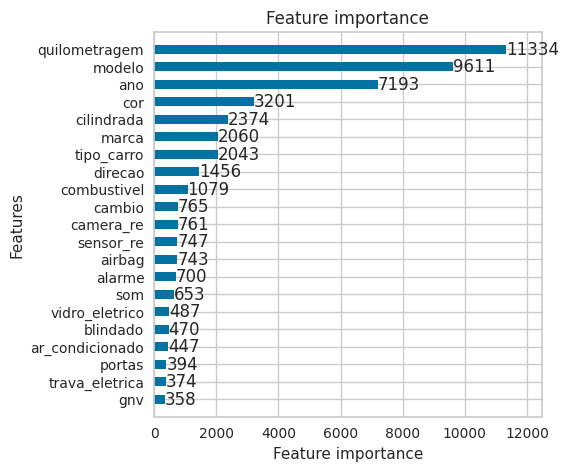

In [584]:
fig =  plt.figure(figsize = (5,5))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()

In [585]:
def hyperopt_gb_score(params):
    clf = GradientBoostingRegressor(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int))            
        }
 
best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.9659873241795962                                    
{'max_depth': 7, 'n_estimators': 762}                 
0.9672918964862014                                                              
{'max_depth': 7, 'n_estimators': 295}                                           
0.9664465288529499                                                              
{'max_depth': 6, 'n_estimators': 933}                                           
0.9710867626954741                                                              
{'max_depth': 3, 'n_estimators': 455}                                           
0.9645240234767162                                                              
{'max_depth': 8, 'n_estimators': 993}                                           
0.9652477952689814                                                              
{'max_depth': 9, 'n_estimators': 301}                                           
0.97088654323369                                                                

In [586]:
params = space_eval(space_gb, best)
params

{'max_depth': 8, 'n_estimators': 993}

In [587]:
# Gradient Boosting Regression

gradient_boosting = GradientBoostingRegressor(**params)
gradient_boosting.fit(train, target)
score_gradient_boosting = result(gradient_boosting,train, test)
score_data['Gradient Boosting Regression'] = score_gradient_boosting
print('R2 score: ', score_gradient_boosting[0])
print('Mean squared error: ', score_gradient_boosting[2])
print('Mean absolute error: ', score_gradient_boosting[3])
print('Root mean squared error: ', score_gradient_boosting[4])

R2 score:  0.9654
Mean squared error:  29807522.79
Mean absolute error:  3654.44
Root mean squared error:  5459.63


In [588]:
predicted_price =  mock_predict_car_price(gradient_boosting)

The predicted price of your car is:   54798.34673465897 $
The real price of your car is:   16500 $


In [589]:
# Bagging Regressor

bagging = BaggingRegressor()
bagging.fit(train, target)
score_bagging = result(bagging,train, test)
score_data['Bagging Regressor'] = score_bagging
print('R2 score: ', score_bagging[0])
print('Mean squared error: ', score_bagging[2])
print('Mean absolute error: ', score_bagging[3])
print('Root mean squared error: ', score_bagging[4])

R2 score:  0.9659
Mean squared error:  29392800.45
Mean absolute error:  3569.65
Root mean squared error:  5421.51


In [590]:
predicted_price =  mock_predict_car_price(bagging)

The predicted price of your car is:   62917.0 $
The real price of your car is:   56000 $


In [591]:
# Extra Trees Regressor

etr = ExtraTreesRegressor()
etr.fit(train, target)
score_etr = result(etr,train, test)
score_data['Extra Trees Regressor'] = score_etr
print('R2 score: ', score_etr[0])
print('Mean squared error: ', score_etr[2])
print('Mean absolute error: ', score_lnr[3])
print('Root mean squared error: ', score_lnr[4])

R2 score:  0.9616
Mean squared error:  33143247.85
Mean absolute error:  8791.91
Root mean squared error:  12529.54


In [592]:
predicted_price =  mock_predict_car_price(etr)

The predicted price of your car is:   132442.3 $
The real price of your car is:   96500 $


In [593]:
# AdaBoost Regression

Ada_Boost = AdaBoostRegressor()
Ada_Boost.fit(train, target)
score_Ada_Boost = result(Ada_Boost,train, test)
score_data['Adaboost Regression'] = score_Ada_Boost
print('R2 score: ', score_Ada_Boost[0])
print('Mean squared error: ', score_Ada_Boost[2])
print('Mean absolute error: ', score_Ada_Boost[3])
print('Root mean squared error: ', score_Ada_Boost[4])

R2 score:  0.8851
Mean squared error:  99106322.29
Mean absolute error:  7153.88
Root mean squared error:  9955.22


In [594]:
predicted_price = mock_predict_car_price(Ada_Boost)

The predicted price of your car is:   63519.40476190476 $
The real price of your car is:   14500 $


In [595]:
# Ridge Regressor

ridge = RidgeCV(cv=5)
ridge.fit(train, target)
score_ridge = result(ridge,train, test)
score_data['Ridge Regressor'] = score_ridge
print('R2 score: ', score_ridge[0])
print('Mean squared error: ', score_ridge[2])
print('Mean absolute error: ', score_ridge[3])
print('Root mean squared error: ', score_ridge[4])

R2 score:  0.8180
Mean squared error:  156974570.25
Mean absolute error:  8789.26
Root mean squared error:  12528.95


In [596]:
predicted_price = mock_predict_car_price(ridge)

The predicted price of your car is:   -147362190.0 $
The real price of your car is:   31900 $


In [597]:
# Stochastic Gradient Descent

sgd = SGDRegressor()
sgd.fit(train, target)
score_sgd = result(sgd,train, test)
score_data['Stochastic Gradient Descent'] = score_sgd
print('R2 score: ', score_sgd[0])
print('Mean squared error: ', score_sgd[2])
print('Mean absolute error: ', score_sgd[3])
print('Root mean squared error: ', score_sgd[4])

R2 score:  0.8158
Mean squared error:  158903682.71
Mean absolute error:  8772.28
Root mean squared error:  12605.70


In [598]:
predicted_price = mock_predict_car_price(sgd)

The predicted price of your car is:   -77209199.72042733 $
The real price of your car is:   84000 $


In [599]:
Voting_Reg = VotingRegressor(estimators=[('lin', linreg), ('ridge', ridge), ('sgd', sgd)])
Voting_Reg.fit(train, target)
score_Voting_Reg = result(Voting_Reg,train, test)
score_data['Adaboost Regression'] = score_Voting_Reg
print('R2 score: ', score_Voting_Reg[0])
print('Mean squared error: ', score_Voting_Reg[2])
print('Mean absolute error: ', score_Voting_Reg[3])
print('Root mean squared error: ', score_Voting_Reg[4])

R2 score:  0.8178
Mean squared error:  157127509.74
Mean absolute error:  8815.66
Root mean squared error:  12535.05


In [600]:
predicted_price = mock_predict_car_price(Voting_Reg)

The predicted price of your car is:   20780663.772974364 $
The real price of your car is:   57000 $


In [601]:
# Support Vector Machines

svr = SVR()
svr.fit(train, target)
score_svr = result(svr,train, test)
score_data['Support Vector Machines'] = score_svr
print('R2 score: ', score_svr[0])
print('Mean squared error: ', score_svr[2])
print('Mean absolute error: ', score_svr[3])
print('Root mean squared error: ', score_svr[4])

R2 score:  -0.0687
Mean squared error:  921787435.21
Mean absolute error:  22234.32
Root mean squared error:  30360.95


In [602]:
predicted_price = mock_predict_car_price(svr)

The predicted price of your car is:   51606.15797879029 $
The real price of your car is:   41400 $


In [603]:
score_data

,Linear Regression,Decision Tree Regression,Random Forest,Gradient Boosting Regression,Bagging Regressor,Extra Trees Regressor,Adaboost Regression,Ridge Regressor,Stochastic Gradient Descent,Support Vector Machines
R2 Score,0.8180,0.9528,0.9665,0.9654,0.9659,0.9616,0.8178,0.8180,0.8158,-0.0687
Accuracy(%),81.7995,95.2821,96.6501,96.5443,96.5924,96.1576,81.7835,81.8012,81.5776,-6.8671
Mean Squared Error,156989338.34,40694662.40,28894877.44,29807522.79,29392800.45,33143247.85,157127509.74,156974570.25,158903682.71,921787435.21
Mean Absolute Error,8791.91,4310.33,3484.30,3654.44,3569.65,3735.02,8815.66,8789.26,8772.28,22234.32
Root MSE,12529.54,6379.24,5375.40,5459.63,5421.51,5757.02,12535.05,12528.95,12605.70,30360.95


In [604]:
for i in score_data.columns:
  score_data[i] = score_data[i].astype(float)
model_accuracy = score_data.loc['Accuracy(%)']

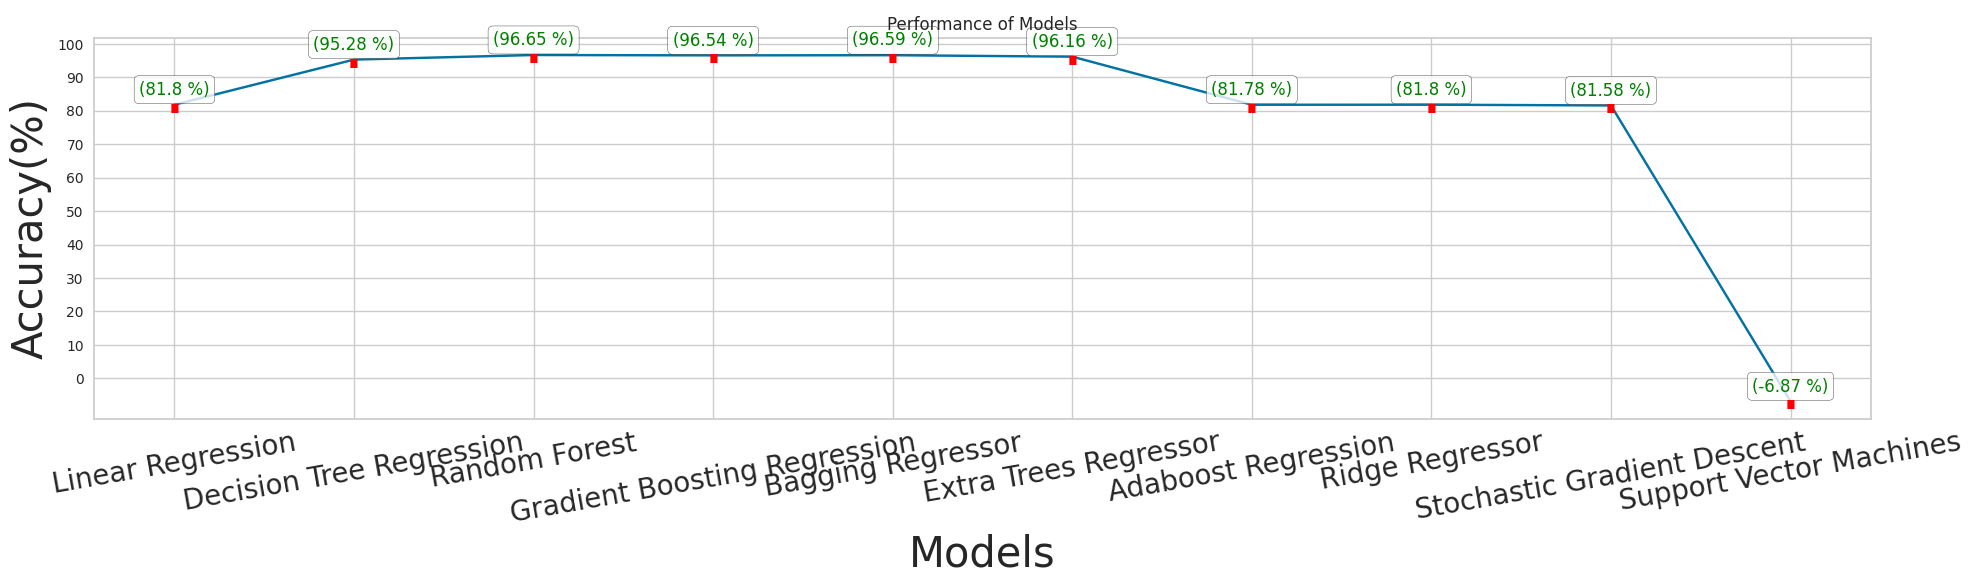

In [605]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show()

In [606]:
#df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df_check = df_check.sample(25)
#round(df_check,2)
#df_check.plot(kind='bar',figsize=(10,5))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.title('Performance of Random Forest')
#plt.ylabel('Mean Squared Log Error')
#plt.savefig('Random-Forest-Performance.jpg')
#plt.show()